## CMSC320 Final Tutorial

Chocolate Dairy Queen Collaborators: <br>
Charlie Zhang, Darren Chea, Quintin (Baongheim) Nguyen

Which champions are the strongest in their respective role in Season 12 League of Legends Pro Play?

The purpose of our tutorial is to create data visualization of statistics of the Season 12 League of Legends Esports/Pro play, focused on the champions (or characters) played. We aim to see the best performing champions in each respective role.  

League of Legends is the game that brought the competitive gaming scene a lot of popularity. It currently boasts one of the highest active player counts while also expanding to multiple different forms of media, maintaining its already high relevance in pop culture. There are constant changes to the current trends and strategies in game so we limited our analysis to just this current ongoing season to maximize relevance.

Below is a table of statistics of the current season with champion information pulled from professional play. 

In [103]:
#Import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

#Data collected from https://gol.gg/champion/list/season-S12/split-ALL/tournament-ALL/
file = "LoL_S12.csv"
table = pd.read_csv(file)

table

,Champion,Role,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg Ban Turn,Game Time,CS per min,Damage per min,Gold per min,CSD@15,GD@15,XPD@15
0,Jinx,ADC,2026.0,1043.0,81.0,1066.0,960.0,53%,4.2,4.6,31:45:00,9.6,549.0,449.0,1.5,69,-77
1,Zeri,ADC,599.0,1951.0,68.0,349.0,250.0,58%,5.0,3.7,31:34:00,9.4,568.0,452.0,-0.3,8,38
2,Lee Sin,Jungle,1335.0,1199.0,67.0,688.0,647.0,52%,3.4,4.3,32:00:00,5.4,277.0,341.0,-2.6,3,-42
3,Xin Zhao,Jungle,1440.0,981.0,64.0,718.0,722.0,50%,2.8,5,32:15:00,5.4,304.0,330.0,-1.9,-92,-72
4,Gwen,Top,903.0,1464.0,63.0,467.0,436.0,52%,2.8,5,31:50:00,8.1,472.0,398.0,0.6,-43,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Warwick,NaN,1.0,0.0,0.0,1.0,0.0,100%,2.4,-,26:14:00,5.6,553.0,405.0,23,1880,1078
156,Brand,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-,0:00:00,NaN,NaN,NaN,NaN,NaN,NaN
157,Katarina,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-,0:00:00,NaN,NaN,NaN,NaN,NaN,NaN
158,Rammus,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-,0:00:00,NaN,NaN,NaN,NaN,NaN,NaN


We want data relevant to what we are looking for and this is general performance of each champion. CSD@15 stands for creep score difference at 15 minutes, GD@15 stands for gold difference at 15 minutes, XPD@15 stands for experience difference at 15 minutes. Avg Ban Turn is which turn, of 5, is that champion typically banned at. All of these are irrelevant towards a champion's performance because it only accounts for the first 15 minutes of gameplay and games are on average, two times this amount of time (~30 minutes). Average Ban Turn is also irrelevant as the champion is banned regardless, meaning they will not be played. 

The other factors such as wins, losses, KDA, presence, role, bans, damage per minute, and gold per minute all provide better insight for a perform, each champion has different scaling so if we were to factor early game champions versus late game champions, the data could be skewed.

We also wanted to focus on only champions who consistently get picked pro play, so we looked only at champions who's presence in the current season is 5% or above.

In [104]:
#Deleting and removing irrelevant columns/rows
del table['CSD@15']
del table['GD@15']
del table['XPD@15']
del table['Avg Ban Turn']

table = table.query("Presence >= 5")
table

table

,Champion,Role,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Game Time,CS per min,Damage per min,Gold per min
0,Jinx,ADC,2026.0,1043.0,81.0,1066.0,960.0,53%,4.2,31:45:00,9.6,549.0,449.0
1,Zeri,ADC,599.0,1951.0,68.0,349.0,250.0,58%,5.0,31:34:00,9.4,568.0,452.0
2,Lee Sin,Jungle,1335.0,1199.0,67.0,688.0,647.0,52%,3.4,32:00:00,5.4,277.0,341.0
3,Xin Zhao,Jungle,1440.0,981.0,64.0,718.0,722.0,50%,2.8,32:15:00,5.4,304.0,330.0
4,Gwen,Top,903.0,1464.0,63.0,467.0,436.0,52%,2.8,31:50:00,8.1,472.0,398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Seraphine,Mid,113.0,127.0,6.0,64.0,49.0,57%,4.8,31:54:00,6.3,345.0,345.0
67,Nidalee,Jungle,82.0,147.0,6.0,40.0,42.0,49%,3.8,32:13:00,6.4,471.0,377.0
68,Fiora,Top,87.0,124.0,6.0,45.0,42.0,52%,2.6,31:05:00,8.2,474.0,405.0
69,Azir,Mid,127.0,82.0,6.0,58.0,69.0,46%,3.1,33:06:00,8.9,570.0,403.0


With every role in the game comes different responsibilities for the team. 
Top, top lane champions, are generally frontliners that act like a shield for the team, but some also provide a lot of damage. 
Jungle, champions who roam around the map, role look to flank the opposing team with their high mobility. 
Mid laners also carry a lot of mobility and either assassinate the opposing backline or provide a lot of support for the team. 
ADC, Attack Damage Carries, are tasked with being a core consistent source of damage, generally having a lot of the resources funneled to them. 
The Support acts to assist the team and keep everyone alive.

To get a general understanding of each champions performance, we can use the KDA (Kill Death Assist Ratio) stat as it is a very common and general way to tell if a champion is playing well. We paired the stat with Picks (number of times the champion is played) to basically see popularity vs performance.

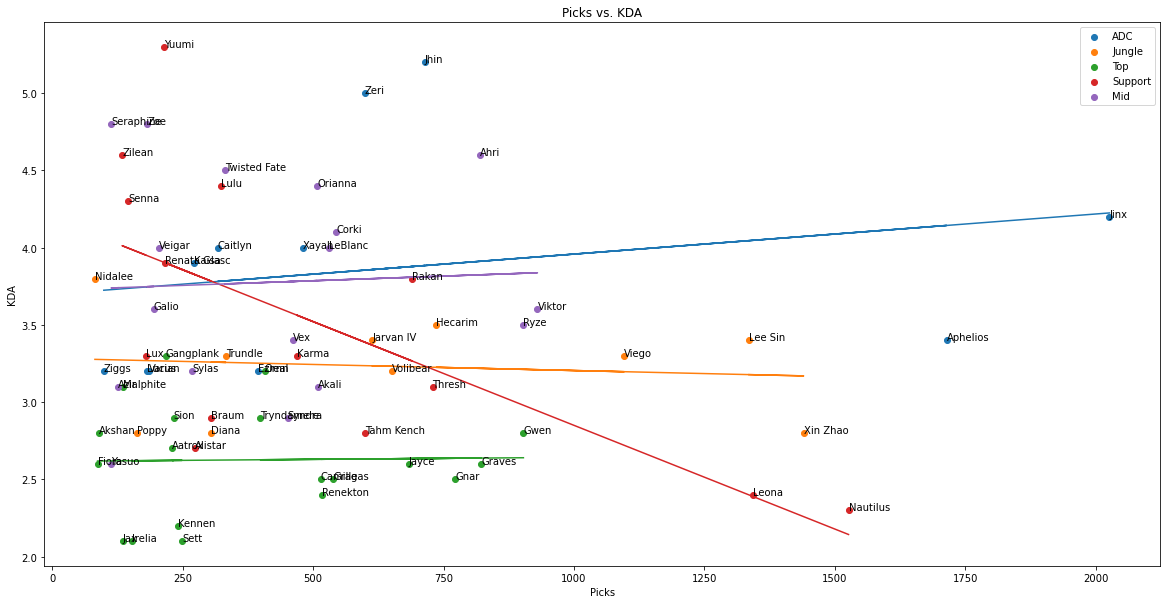

In [105]:
#Plot Picks vs KDA
f = plt.figure(0)
f.set_figwidth(20)
f.set_figheight(10)

#Label the plot
champions = table['Champion'].unique()
role = table['Role'].unique()
plt.xlabel("Picks")
plt.ylabel("KDA")
plt.title("Picks vs. KDA")

#Find coordinates for each champion and label with role
for curr in role:
    curr_role = table.query("Role == '{0}'".format(curr))
    picks = curr_role['Picks']
    kda = curr_role['KDA']
    plt.scatter(picks, kda, label = curr)
    
    #Regression line for each role
    m,b = np.polyfit(curr_role['Picks'], curr_role['KDA'],1)
    plt.plot(curr_role['Picks'], m*curr_role['Picks'] + b)
    
#Label each Champion
for i, text in enumerate(champions):
    plt.annotate(text, (table['Picks'][i], table['KDA'][i]))
                 
plt.legend()

Each champion is labeled with their role and names.
Based on the regression lines, we can see that the support role, which typically plays a less damage involved role has a lower KDA average as the champion is picked more. In professional play, the support is either an enchanter who primarily buffs (aka empower) the team or a tank who primarily engages fights and have a lot of armor, magic resistance, and health. 
We can see that Nautilus and Leona are tank supports that are heavily picked but have really low KDA averages and this might be due to the fact that supports that engage typically die very often which will lower their KDAs. We also see outliers such as Yuumi in the support role, she has the highest KDA average, but a lower pick rate.  

We can also see based on the regression lines that ADC and Mid laners are the roles that have high pick rates and high KDA averages. 

<AxesSubplot:xlabel='Role', ylabel='KDA'>

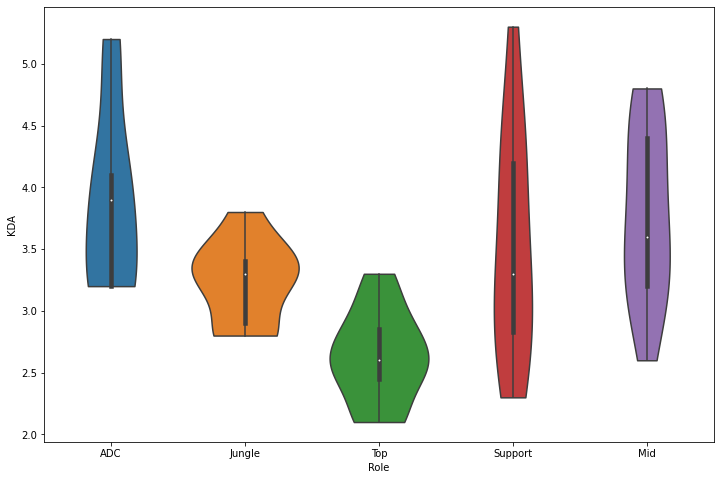

In [106]:
# Standard Deviation of KDAs per Role
plt.subplots(figsize = (12,8))
sb.violinplot(x = table["Role"], y = table["KDA"], cut = 0)

Our scatterplot was able to show us some general trends regarding the data and with the violin plot above, we can determine the density measures of data as a distribution. The KDA distribution per role is better represented in the above violin plot.

Jungle and Top lane have a lower KDA variance when compared to ADC, Support, and Mid lane. 
Jungle KDA is in the range of 2.8-3.8.
Top lane KDA is in the range of 2.1-3.3.
Both these ranges are a reasonable ~1 point apart. 
ADC KDA is in the range of 3.1-5.2 
Support KDA is in the range of 2.3-5.3
Mid lane KDA is in the range of 2.6-4.8. 

Aside from Top and Jungle, the ranges are much more significant and this might be due to the specific champions being played in the other roles that have better damage and potential for higher KDA.

With all of these different roles, it is best that we standardize them so that we are comparing best champions amongst their respective roles. We can standardize the roles by KDA.

With this standardized KDA stat, we can have a clearer picture of how to rank champions given their specific roles

In [107]:
#Finding mean and standard deviation of KDA for each role
avg_KDA = table.groupby(['Role'])['KDA'].mean()
std_KDA = table.groupby(['Role'])['KDA'].std()

#New Column
table['STD_KDA'] = 0.0

#Calculate Standardized KDA for each champion
for idx, row in table.iterrows():

    curr_KDA = row['KDA']
    pos = row[1]
    curr_Avg_KDA = avg_KDA[pos]
    curr_Std_KDA = std_KDA[pos]
    
    standardized_KDA = (curr_KDA - curr_Avg_KDA)/curr_Std_KDA
    table.at[idx, 'STD_KDA'] = standardized_KDA

table

/tmp/ipykernel_126/1962437354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['STD_KDA'] = 0.0


,Champion,Role,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Game Time,CS per min,Damage per min,Gold per min,STD_KDA
0,Jinx,ADC,2026.0,1043.0,81.0,1066.0,960.0,53%,4.2,31:45:00,9.6,549.0,449.0,0.466208
1,Zeri,ADC,599.0,1951.0,68.0,349.0,250.0,58%,5.0,31:34:00,9.4,568.0,452.0,1.575027
2,Lee Sin,Jungle,1335.0,1199.0,67.0,688.0,647.0,52%,3.4,32:00:00,5.4,277.0,341.0,0.504728
3,Xin Zhao,Jungle,1440.0,981.0,64.0,718.0,722.0,50%,2.8,32:15:00,5.4,304.0,330.0,-1.276665
4,Gwen,Top,903.0,1464.0,63.0,467.0,436.0,52%,2.8,31:50:00,8.1,472.0,398.0,0.482039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Seraphine,Mid,113.0,127.0,6.0,64.0,49.0,57%,4.8,31:54:00,6.3,345.0,345.0,1.487975
67,Nidalee,Jungle,82.0,147.0,6.0,40.0,42.0,49%,3.8,32:13:00,6.4,471.0,377.0,1.692323
68,Fiora,Top,87.0,124.0,6.0,45.0,42.0,52%,2.6,31:05:00,8.2,474.0,405.0,-0.073036
69,Azir,Mid,127.0,82.0,6.0,58.0,69.0,46%,3.1,33:06:00,8.9,570.0,403.0,-0.983431


Another important statistic that would aid in determining the best champions amongst pro play would be seeing which champions have a strong presence in pro play. Presence in this sense is the percentage of games where the champion is either picked or banned. 

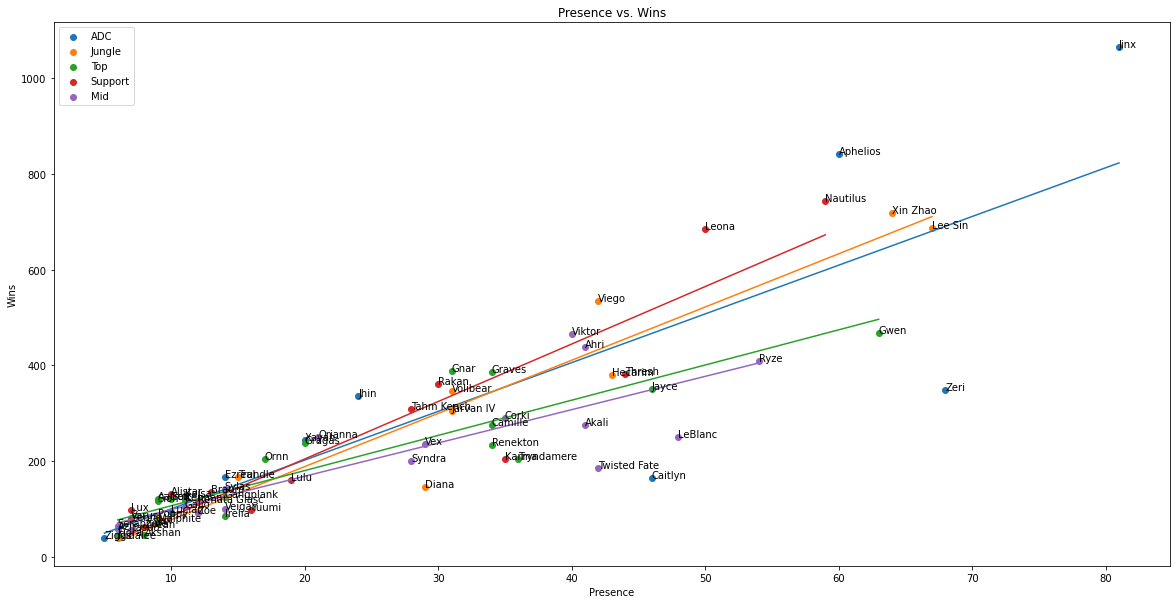

In [108]:
#Plot Presence vs Wins
f = plt.figure(0)
f.set_figwidth(20)
f.set_figheight(10)

#Label for the plot
champions = table['Champion'].unique()
role = table['Role'].unique()
plt.xlabel("Presence")
plt.ylabel("Wins")
plt.title("Presence vs. Wins")

#Find coordinates and label each role
for curr in role:
    curr_role = table.query("Role == '{0}'".format(curr))
    presence = curr_role['Presence']
    wins = curr_role['Wins']
    plt.scatter(presence, wins, label = curr)
    
    #Regression line for each role
    m,b = np.polyfit(curr_role['Presence'], curr_role['Wins'],1)
    plt.plot(curr_role['Presence'], m*curr_role['Presence'] + b)
    
#Label each Champion
for i, text in enumerate(champions):
    plt.annotate(text, (table['Presence'][i], table['Wins'][i]))
                 
plt.legend()

The linear regression line in the model above shows a strong relation between a champion's presence percentage and the number of wins that champion has garnered. This also supports how crucial this statistic will be in determining the best champions given their roles.

<AxesSubplot:xlabel='Role', ylabel='Presence'>

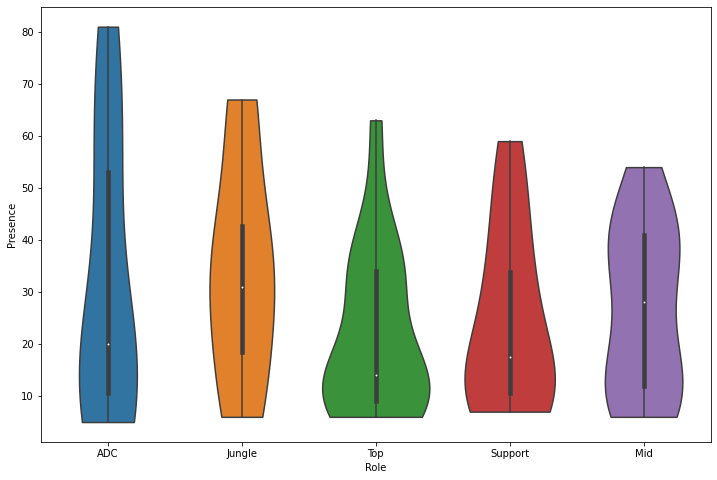

In [109]:
# Standard Deviation of Presence in Roles
plt.subplots(figsize = (12,8))
sb.violinplot(x = table["Role"], y = table["Presence"], cut = 0)

This shows us the spread of presence across every role. 
We can see that ADC has the highest variance in Presence, meaning that ADC is the role with outlying stronger champions compared to other roles
Jungle also carries some unbalance in terms of the champion pool.
Top being the role with the density being at the lower presences can mean that Top is the role where many champions are interchangable and with the least unbalance.
Support also holds a more balanced/closer gap between champions.
Mid boasts the most separated pool of champions where many either have a high presence (~40) or just a low presence (~10)

This indicates that there are clearly certain champions that are better than others in each role and this stat should also be standardized for each role.

In [110]:
#Average presence and Standard Deviation for each role
avg_pres = table.groupby(['Role'])['Presence'].mean()
std_pres = table.groupby(['Role'])['Presence'].std()

#New column
table['STD_Presence'] = 0.0

#Standardize presence for each champion
for idx, row in table.iterrows():

    curr_pres = row['Presence']
    pos = row[1]
    curr_Avg_pres = avg_pres[pos]
    curr_Std_pres = std_pres[pos]


    standardized_pres = (curr_pres - curr_Avg_pres)/curr_Std_pres
    table.at[idx, 'STD_Presence'] = standardized_pres

table

/tmp/ipykernel_126/1339734163.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['STD_Presence'] = 0.0


,Champion,Role,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Game Time,CS per min,Damage per min,Gold per min,STD_KDA,STD_Presence
0,Jinx,ADC,2026.0,1043.0,81.0,1066.0,960.0,53%,4.2,31:45:00,9.6,549.0,449.0,0.466208,1.810989
1,Zeri,ADC,599.0,1951.0,68.0,349.0,250.0,58%,5.0,31:34:00,9.4,568.0,452.0,1.575027,1.335812
2,Lee Sin,Jungle,1335.0,1199.0,67.0,688.0,647.0,52%,3.4,32:00:00,5.4,277.0,341.0,0.504728,1.590309
3,Xin Zhao,Jungle,1440.0,981.0,64.0,718.0,722.0,50%,2.8,32:15:00,5.4,304.0,330.0,-1.276665,1.447038
4,Gwen,Top,903.0,1464.0,63.0,467.0,436.0,52%,2.8,31:50:00,8.1,472.0,398.0,0.482039,2.602004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Seraphine,Mid,113.0,127.0,6.0,64.0,49.0,57%,4.8,31:54:00,6.3,345.0,345.0,1.487975,-1.266475
67,Nidalee,Jungle,82.0,147.0,6.0,40.0,42.0,49%,3.8,32:13:00,6.4,471.0,377.0,1.692323,-1.322869
68,Fiora,Top,87.0,124.0,6.0,45.0,42.0,52%,2.6,31:05:00,8.2,474.0,405.0,-0.073036,-0.996936
69,Azir,Mid,127.0,82.0,6.0,58.0,69.0,46%,3.1,33:06:00,8.9,570.0,403.0,-0.983431,-1.266475


To rank performance for champions we will need to see standardized values for a couple more stats. 
Win rate, for League of Legends, is generally very balanced around 50%. Even so a champion with a higher win rate generally correlates to a great separation between the average champions and great champions. 
Damage per minute is also a stat that will prove to be useful for offensive roles like Jungle, Mid, ADC, and sometimes Top. Top can be a good source of damage, but generally is not always the case. Support is not focused on dealing damage to the opposing team.

In [111]:
#Standardize other varibles

#Get rid of % sign in Winrate
table['Winrate'] = table['Winrate'].str.rstrip('%').astype('int')

#Average and Standard Deviation Winrate for each role
avg_winrate = table.groupby(['Role'])['Winrate'].mean()
std_winrate = table.groupby(['Role'])['Winrate'].std()

#Average and Standard Deviation Damage per Minute for each role
avg_DPM = table.groupby(['Role'])['Damage per min'].mean()
std_DPM = table.groupby(['Role'])['Damage per min'].std()

#New Columns
table['STD_Winrate'] = 0.0
table['STD_DPM'] = 0.0

#Calculate Standardized Winrate and DPM for each champion
for idx, row in table.iterrows():

    curr_winrate = row['Winrate']
    curr_DPM = row['Damage per min']
    
    pos = row[1]
    
    curr_Avg_winrate = avg_winrate[pos]
    curr_Std_winrate = std_winrate[pos]
    curr_Avg_DPM = avg_DPM[pos]
    curr_Std_DPM = std_DPM[pos]


    standardized_winrate = (curr_winrate - curr_Avg_winrate)/curr_Std_winrate
    standardized_DPM = (curr_DPM - curr_Avg_DPM)/curr_Std_DPM
    
    table.at[idx, 'STD_Winrate'] = standardized_winrate
    table.at[idx, 'STD_DPM'] = standardized_DPM

table

/tmp/ipykernel_126/2116054670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Winrate'] = table['Winrate'].str.rstrip('%').astype('int')
/tmp/ipykernel_126/2116054670.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['STD_Winrate'] = 0.0
/tmp/ipykernel_126/2116054670.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,Champion,Role,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Game Time,CS per min,Damage per min,Gold per min,STD_KDA,STD_Presence,STD_Winrate,STD_DPM
0,Jinx,ADC,2026.0,1043.0,81.0,1066.0,960.0,53,4.2,31:45:00,9.6,549.0,449.0,0.466208,1.810989,0.854321,-0.202876
1,Zeri,ADC,599.0,1951.0,68.0,349.0,250.0,58,5.0,31:34:00,9.4,568.0,452.0,1.575027,1.335812,1.757929,0.125815
2,Lee Sin,Jungle,1335.0,1199.0,67.0,688.0,647.0,52,3.4,32:00:00,5.4,277.0,341.0,0.504728,1.590309,1.014185,-0.346056
3,Xin Zhao,Jungle,1440.0,981.0,64.0,718.0,722.0,50,2.8,32:15:00,5.4,304.0,330.0,-1.276665,1.447038,-0.253546,0.017505
4,Gwen,Top,903.0,1464.0,63.0,467.0,436.0,52,2.8,31:50:00,8.1,472.0,398.0,0.482039,2.602004,0.328482,0.334262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Seraphine,Mid,113.0,127.0,6.0,64.0,49.0,57,4.8,31:54:00,6.3,345.0,345.0,1.487975,-1.266475,1.690806,-1.313067
67,Nidalee,Jungle,82.0,147.0,6.0,40.0,42.0,49,3.8,32:13:00,6.4,471.0,377.0,1.692323,-1.322869,-0.887412,2.266198
68,Fiora,Top,87.0,124.0,6.0,45.0,42.0,52,2.6,31:05:00,8.2,474.0,405.0,-0.073036,-0.996936,0.328482,0.357108
69,Azir,Mid,127.0,82.0,6.0,58.0,69.0,46,3.1,33:06:00,8.9,570.0,403.0,-0.983431,-1.266475,-1.236793,0.894617


### ANALYSIS

Now with all relevant data standardized, we can start analyzing each champion and ranking them amongst their roles. 
First, we will look to score the damage focus roles (all roles except support). 
The score is produced to see how all their standardized values fair compared to other values from other champions in the same role. 

This ranking will have a bias towards damage dealing champions in each role, so champions in roles that have varied responsibilities, like Top, will have a skewed ranking.

In [112]:
#Calculate rank of each damage champion in respective roles

#Isolate damage roles
damage_roles = table.query("Role != 'Support'")
damage_roles['Score'] = 0.0   #New Column

#Calculate each champions score
for i, row in damage_roles.iterrows():
    curr_kda = row['STD_KDA']
    curr_presence = row['STD_Presence']
    curr_wr = row['STD_Winrate']
    curr_dpm = row['STD_DPM']
    score = curr_kda + curr_presence + curr_wr + curr_dpm
    damage_roles.at[i, 'Score'] = score
    
#Separate champions into each role and sort by score
damage_roles = damage_roles.sort_values(by='Score', ascending = False)
damage_roles = damage_roles.reset_index()
damage_roles.index += 1

Top_ranking = damage_roles.query("Role == 'Top'")
Top_ranking = Top_ranking.reset_index()
Top_ranking.index += 1

Jungle_ranking = damage_roles.query("Role == 'Jungle'")
Jungle_ranking = Jungle_ranking.reset_index()
Jungle_ranking.index += 1

Mid_ranking = damage_roles.query("Role == 'Mid'")
Mid_ranking = Mid_ranking.reset_index()
Mid_ranking.index += 1

ADC_ranking = damage_roles.query("Role == 'ADC'")
ADC_ranking = ADC_ranking.reset_index()
ADC_ranking.index += 1

#Display Findings
print("Top 5 Top Laners:\n", Top_ranking[['Champion', 'Score']].head(5), '\n')
print("Top 5 Junglers:\n", Jungle_ranking[['Champion', 'Score']].head(5), '\n')
print("Top 5 Mid Laners:\n", Mid_ranking[['Champion', 'Score']].head(5), '\n')
print("Top 5 Attack Damage Carries:\n", ADC_ranking[['Champion', 'Score']].head(5), '\n')
print("Top 5 Overall Damage Champions:\n", damage_roles[['Champion', 'Score']].head(5), '\n')

Top 5 Top Laners:
     Champion     Score
1  Gangplank  5.251455
2      Jayce  3.945757
3       Gwen  3.746787
4   Malphite  1.181926
5    Camille  1.152089 

Top 5 Junglers:
    Champion     Score
1   Lee Sin  2.763165
2   Nidalee  1.748239
3   Hecarim  1.414682
4  Volibear  1.030120
5  Xin Zhao -0.065668 

Top 5 Mid Laners:
        Champion     Score
1         Corki  3.956588
2          Ahri  3.065152
3  Twisted Fate  2.689910
4        Viktor  2.025229
5       LeBlanc  1.107615 

Top 5 Attack Damage Carries:
   Champion     Score
1     Zeri  4.794583
2     Jinx  2.928641
3    Xayah  0.942593
4  Caitlyn  0.603208
5     Jhin -0.288995 

Top 5 Overall Damage Champions:
     Champion     Score
1  Gangplank  5.251455
2       Zeri  4.794583
3      Corki  3.956588
4      Jayce  3.945757
5       Gwen  3.746787 



/tmp/ipykernel_126/2868831804.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damage_roles['Score'] = 0.0   #New Column


Since support is not damage oriented, we will only factor KDA, Presence, and Winrate into our algorithm to compute their ranking. We will also use the same algorithm to recompute Top lane to see how the rankings change and keep the rankings as unbias as possible.

In [113]:
#Calculate rank of each supportive champion in respective roles

#Isolate supportive roles
supportive_roles = table.query("Role == 'Support' or Role == 'Top'")
supportive_roles['Score'] = 0.0

#Calculate score for each champion
for i, row in supportive_roles.iterrows():
    curr_kda = row['STD_KDA']
    curr_presence = row['STD_Presence']
    curr_wr = row['STD_Winrate']
    score = curr_kda + curr_presence + curr_wr
    supportive_roles.at[i, 'Score'] = score
    
#Separate into each role and sort by score
supportive_roles = supportive_roles.sort_values(by='Score', ascending = False)
supportive_roles = supportive_roles.reset_index()
supportive_roles.index += 1

Top_ranking2 = supportive_roles.query("Role == 'Top'")
Top_ranking2 = Top_ranking2.reset_index()
Top_ranking2.index += 1

Support_ranking = supportive_roles.query("Role == 'Support'")
Support_ranking = Support_ranking.reset_index()
Support_ranking.index += 1

#Display Findings
print("Top 5 Top Laners:\n", Top_ranking2[['Champion', 'Score']].head(5), '\n')
print("Top 5 Supports:\n", Support_ranking[['Champion', 'Score']].head(5), '\n')
print("Top 5 Overall Supportive Champions:\n", supportive_roles[['Champion', 'Score']].head(5), '\n')

Top 5 Top Laners:
      Champion     Score
1        Gwen  3.412524
2   Gangplank  3.192374
3    Malphite  1.727207
4  Tryndamere  1.688103
5       Jayce  1.486884 

Top 5 Supports:
        Champion     Score
1        Thresh  1.453448
2         Rakan  1.418544
3  Renata Glasc  0.762216
4         Leona  0.746480
5         Senna  0.638955 

Top 5 Overall Supportive Champions:
      Champion     Score
1        Gwen  3.412524
2   Gangplank  3.192374
3    Malphite  1.727207
4  Tryndamere  1.688103
5       Jayce  1.486884 



/tmp/ipykernel_126/3214643211.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supportive_roles['Score'] = 0.0


### CONCLUSION

After gathering data on the statistics of champions during pro play, we were able to find the Top 5 performing champions in each role, and overall, for the League of Legends Competitive Season 12. 

In a team eSport like League of Legends, isolating single statistics and gauging champions based off those statistics fails to capture everything as a whole. In this game offensive play is not the only thing that is needed. There are other datapoints that would prove to give a more accurate representation of good performance for each role. We tried to keep the analysis as unbiased as possible, but with the data at hand it was difficult to do so. 

In the end, things like team composition, players mechanical skill, and balance changes from the developers are all very crucial factors that cannot be measures with pure statistics and these inconsistencies are exactly why League of Legends is so inviting and continues to enchant many players with its new developments and changes.